### IMPORT MODULES

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

### TRAIN TEST SPLIT

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

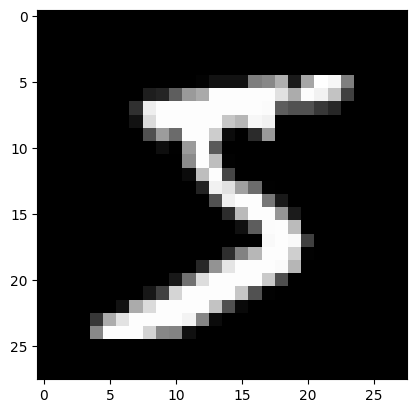

In [3]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0],cmap=plt.get_cmap('gray'))

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_train=X_train.reshape(X_train.shape[0],28,28,1).astype('float32')
X_test=X_test.reshape(X_test.shape[0],28,28,1).astype('float32')

y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [6]:
X_train=X_train/255
X_test=X_test/255

In [22]:

#model = Sequential()
#model.add(Flatten())
#model.add(Dense(128, activation='relu'))  #hidden layer
#model.add(Dense(10, activation='softmax'))  #output layer///


from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
input_shape = (28, 28, 1)
num_classes = 10 
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=25, validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 102s 67ms/step - loss: 0.1652 - accuracy: 0.9493 - val_loss: 0.0553 - val_accuracy: 0.9852
Epoch 2/25
1500/1500 [==============================] - 104s 69ms/step - loss: 0.0689 - accuracy: 0.9790 - val_loss: 0.0541 - val_accuracy: 0.9844
Epoch 3/25
1500/1500 [==============================] - 103s 69ms/step - loss: 0.0478 - accuracy: 0.9842 - val_loss: 0.0372 - val_accuracy: 0.9898
Epoch 4/25
1500/1500 [==============================] - 110s 74ms/step - loss: 0.0384 - accuracy: 0.9880 - val_loss: 0.0386 - val_accuracy: 0.9902
Epoch 5/25
1500/1500 [==============================] - 122s 82ms/step - loss: 0.0338 - accuracy: 0.9890 - val_loss: 0.0374 - val_accuracy: 0.9894
Epoch 6/25
1500/1500 [==============================] - 157s 105ms/step - loss: 0.0278 - accuracy: 0.9913 - val_loss: 0.0389 - val_accuracy: 0.9902
Epoch 7/25
1500/1500 [==============================] - 156s 104ms/step - loss: 0.0238 - accuracy: 0.9924 - val_loss:

In [23]:
model.save('digitrecog2.h')

INFO:tensorflow:Assets written to: digitrecog2.h\assets


INFO:tensorflow:Assets written to: digitrecog2.h\assets


In [24]:
scores=model.evaluate(X_test,y_test,verbose=0)

In [25]:
scores

[0.05036384239792824, 0.9904000163078308]

In [26]:
y_prob = model.predict(X_test)

313/313 [==============================] - 8s 23ms/step


In [27]:
y_pred = y_prob.argmax(axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

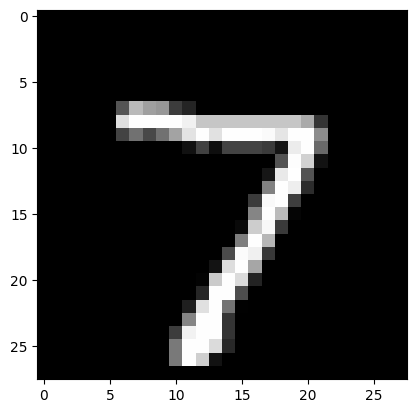

In [31]:
plt.imshow(X_test[0],cmap=plt.get_cmap('gray'))

In [32]:
model.predict(X_test[0].reshape(1,28,28,1)).argmax(axis=1)

1/1 [==============================] - 0s 78ms/step


array([7], dtype=int64)

In [30]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 7s 22ms/step - loss: 0.0504 - accuracy: 0.9904


[0.05036384239792824, 0.9904000163078308]